<a href="https://colab.research.google.com/github/JoanWaweru/Sentiment-Analysis-for-Code-Switched-Language/blob/main/SafaricomProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading Dataset 

In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read csv file into a pandas dataframe
from google.colab import files
uploaded = files.upload()

Saving safaricomDataset.csv to safaricomDataset.csv


In [4]:
df = pd.read_csv('safaricomDataset.csv')
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...
1,1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...
2,2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM
3,3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://..."
4,4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...


In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'User', 'Tweet'], dtype='object')

In [6]:
df.shape

(5000, 4)

In [7]:
tweets_df = df[["Date", "User", "Tweet"]]
tweets_df.head()

,Date,User,Tweet
0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...
1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...
2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM
3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://..."
4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...


In [8]:
from sklearn import utils
tweets_df.shape

(5000, 3)

Preprocessing and Cleaning of the Dataset 

In [9]:
import nltk
from nltk.tokenize import word_tokenize

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.9 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=bdcacbde4cd6ed0efd4c24b7190969fa8510cb452c80e3584e45f84ee3b95c97
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [12]:
import re
import emoji
def tokenize_tweets(text):
  #remove emojis
  text = emoji.demojize(text)
  #remove urls
  text = re.sub('http[s]?://\S+', '', text)
  #remove punctuations
  text = re.sub(r'[^\w\s]','',text)
  #strip numbers
  text = re.sub('[0-9]+', '', text)
  text = word_tokenize(text)
  
  return text
tweets_df["Tweets"] = tweets_df["Tweet"].apply(lambda x: tokenize_tweets(x))
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words("english")
tweets_df["stop_words"] = tweets_df["Tweets"].apply(lambda x: [w for w in x if w in stop])
tweets_df["Tweets"] = tweets_df["Tweets"].apply(lambda x: [w.lower() for w in x if w not in stop])

tweets_df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Date,User,Tweet,Tweets,stop_words
0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...,"[waxspell, safaricom_care, askpaypal, sponyo, ...",[]
1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...,"[safaricom_care, safaricomplc, official, roami...","[what, are, of, is]"
2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM,"[safaricom_care, check, dm]",[]
3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://...","[martinkanini, hello, martin, please, dm, scre...","[a, of, the, for, to, and]"
4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...,"[safaricom_care, getting, otp, several, time, ...","[am, some, of, them, at, this, of, the, my]"
5,2022-10-23 21:48:31+00:00,Reyherb254,@Cutie_254 @Safaricom_Care @iconic_gravity @it...,"[cutie_, safaricom_care, iconic_gravity, itsmj...",[]
6,2022-10-23 21:29:20+00:00,Daktari_Kip,Fb @Safaricom_Care,"[fb, safaricom_care]",[]
7,2022-10-23 21:20:20+00:00,Safaricom_Care,"@c_hir_i Hello, you can view detailed data usa...","[c_hir_i, hello, view, detailed, data, usage, ...","[you, can, on, this, if, you, a, with, this, a]"
8,2022-10-23 21:11:45+00:00,RotinhoD,@Safaricom_Care message kaa hii ni kitu mnaan...,"[safaricom_care, message, kaa, hii, ni, kitu, ...",[]
9,2022-10-23 21:08:48+00:00,c_hir_i,#saf_for_you\n🫤🙄I guess niko #6G \n@Safaricom_...,"[saf_for_you, face_with_diagonal_mouthface_wit...",[]


In [13]:
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words
0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...,"[waxspell, safaricom_care, askpaypal, sponyo, ...",[]
1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...,"[safaricom_care, safaricomplc, official, roami...","[what, are, of, is]"
2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM,"[safaricom_care, check, dm]",[]
3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://...","[martinkanini, hello, martin, please, dm, scre...","[a, of, the, for, to, and]"
4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...,"[safaricom_care, getting, otp, several, time, ...","[am, some, of, them, at, this, of, the, my]"


In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tweets_df["Tweets"] = tweets_df["Tweets"].apply(lambda x: [stemmer.stem(w) for w in x])
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words
0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...,"[waxspel, safaricom_car, askpayp, sponyo, alif...",[]
1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...,"[safaricom_car, safaricomplc, offici, roam, ra...","[what, are, of, is]"
2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM,"[safaricom_car, check, dm]",[]
3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://...","[martinkanini, hello, martin, pleas, dm, scree...","[a, of, the, for, to, and]"
4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...,"[safaricom_car, get, otp, sever, time, night, ...","[am, some, of, them, at, this, of, the, my]"


In [16]:
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  text = re.sub('[0-9]+', '', text)
  
  
  return text
tweets_df['tweet_punct'] = tweets_df['Tweets'].apply(lambda x: remove_punct(x))

In [17]:
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words,tweet_punct
0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...,"[waxspel, safaricom_car, askpayp, sponyo, alif...",[],waxspel safaricom_car askpayp sponyo alifinya ...
1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...,"[safaricom_car, safaricomplc, offici, roam, ra...","[what, are, of, is]",safaricom_car safaricomplc offici roam rate ma...
2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM,"[safaricom_car, check, dm]",[],safaricom_car check dm
3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://...","[martinkanini, hello, martin, pleas, dm, scree...","[a, of, the, for, to, and]",martinkanini hello martin pleas dm screenshot ...
4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...,"[safaricom_car, get, otp, sever, time, night, ...","[am, some, of, them, at, this, of, the, my]",safaricom_car get otp sever time night is numb...


Data Visualization(Word Cloud)

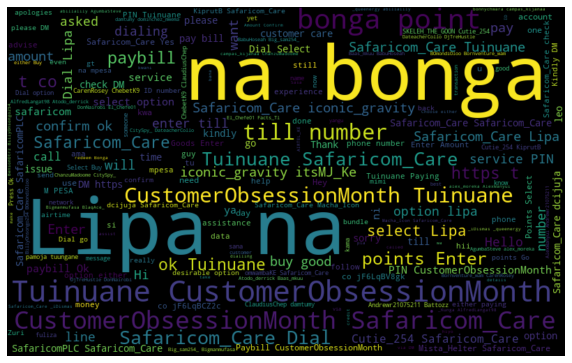

In [18]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df['Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Get the most frequent words

In [19]:
from collections import Counter

cnt = Counter()
for text in df["Tweet"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20)

[('@Safaricom_Care', 4498),
 ('the', 1819),
 ('#Tuinuane', 1815),
 ('#CustomerObsessionMonth', 1663),
 ('to', 1346),
 ('na', 1314),
 ('*126#', 1285),
 ('and', 1246),
 ('bonga', 1006),
 ('number', 909),
 ('or', 875),
 ('points', 834),
 ('till', 787),
 ('Dial', 631),
 ('you', 592),
 ('Lipa', 592),
 ('I', 591),
 ('for', 577),
 ('Enter', 556),
 ('paybill', 549)]

Using Vader Library to analyse sentiments in Text

In [20]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 9.3 MB/s 


Training of Dataset

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Getting the sentiments label

In [22]:
def sentiment_score_compound(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['compound']

def sentiment_score_pos(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['pos']

def sentiment_score_neg(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neg']

def sentiment_score_neu(sentence):
    score = analyzer.polarity_scores(sentence)
    return score['neu']
tweets_df["tweets_sent_compound"] = tweets_df["Tweet"].apply(lambda x: sentiment_score_compound(x))
tweets_df["tweets_sent_pos"] = tweets_df["Tweet"].apply(lambda x: sentiment_score_pos(x))
tweets_df["tweets_sent_neg"] = tweets_df["Tweet"].apply(lambda x: sentiment_score_neg(x))
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg
0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...,"[waxspel, safaricom_car, askpayp, sponyo, alif...",[],waxspel safaricom_car askpayp sponyo alifinya ...,0.0000,0.000,0.0
1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...,"[safaricom_car, safaricomplc, offici, roam, ra...","[what, are, of, is]",safaricom_car safaricomplc offici roam rate ma...,0.0000,0.000,0.0
2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM,"[safaricom_car, check, dm]",[],safaricom_car check dm,0.0000,0.000,0.0
3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://...","[martinkanini, hello, martin, pleas, dm, scree...","[a, of, the, for, to, and]",martinkanini hello martin pleas dm screenshot ...,0.3182,0.119,0.0
4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...,"[safaricom_car, get, otp, sever, time, night, ...","[am, some, of, them, at, this, of, the, my]",safaricom_car get otp sever time night is numb...,0.4939,0.208,0.0


In [23]:
tweets_df.tail()

,Date,User,Tweet,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg
4995,2022-10-20 11:51:05+00:00,campas_kijanaa,@Safaricom_Care They were so generous\n#Tuinua...,"[safaricom_car, they, gener, tuinuan, customer...","[were, so]",safaricom_car they gener tuinuan customerobses...,0.6418,0.414,0.000
4996,2022-10-20 11:51:01+00:00,KiplagatEvans16,@Safaricom_Care Nyi maumbwa hamtanijenga hiyo ...,"[safaricom_car, nyi, maumbwa, hamtanijenga, hi...",[],safaricom_car nyi maumbwa hamtanijenga hiyo kr...,-0.2960,0.000,0.180
4997,2022-10-20 11:50:48+00:00,Safaricom_Care,"@muriukiabraham Hey Abraham, request your mum...","[muriukiabraham, hey, abraham, request, mum, u...","[your, to, the, then, to, the, the, of, the, b...",muriukiabraham hey abraham request mum unblock...,0.0000,0.000,0.000
4998,2022-10-20 11:50:45+00:00,Agropons_Farm,@Safaricom_Care It was great and I was satisfi...,"[safaricom_car, it, great, i, satisfi, tuinuan...","[was, and, was]",safaricom_car it great i satisfi tuinuan custo...,0.7845,0.434,0.000
4999,2022-10-20 11:50:45+00:00,Baas_mkuu,"@Safaricom_Care Yes, nilisaidika instantly bil...","[safaricom_car, ye, nilisaidika, instantli, bi...","[but, the, is, but, very]",safaricom_car ye nilisaidika instantli bilater...,0.6419,0.291,0.161


In [24]:
import nltk
wordlist = nltk.FreqDist(all_words)
word_features = wordlist.keys()

Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweets_list = []
for tweet in tweets_df["tweet_punct"]:
  
  tweets_list.append(tweet)
len(tweets_list)
tfIdf = TfidfVectorizer(max_features=20000)

In [26]:
X = tweets_df["tweet_punct"]

vec = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf = True,use_idf = True,ngram_range=(1, 2))
len(all_words)

546906

Define Label

In [27]:
def label_value(val):
  if val < 0:
    return 0
  elif val == 0:
    return 1
  else:
    return 2
tweets_df["label"] = tweets_df["tweets_sent_compound"].apply(lambda x: label_value(x))
tweets_df.head()

,Date,User,Tweet,Tweets,stop_words,tweet_punct,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg,label
0,2022-10-23 23:37:49+00:00,samsabwa,@waxspell @Safaricom_Care @AskPayPal sponyo al...,"[waxspel, safaricom_car, askpayp, sponyo, alif...",[],waxspel safaricom_car askpayp sponyo alifinya ...,0.0000,0.000,0.0,1
1,2022-10-23 23:36:25+00:00,zac124,@Safaricom_Care @SafaricomPLC \n\nwhat are off...,"[safaricom_car, safaricomplc, offici, roam, ra...","[what, are, of, is]",safaricom_car safaricomplc offici roam rate ma...,0.0000,0.000,0.0,1
2,2022-10-23 23:19:35+00:00,tonui_ke,@Safaricom_Care check DM,"[safaricom_car, check, dm]",[],safaricom_car check dm,0.0000,0.000,0.0,1
3,2022-10-23 22:14:19+00:00,Safaricom_Care,"@martinkanini Hello Martin, please DM https://...","[martinkanini, hello, martin, pleas, dm, scree...","[a, of, the, for, to, and]",martinkanini hello martin pleas dm screenshot ...,0.3182,0.119,0.0,2
4,2022-10-23 22:01:01+00:00,martinkanini,@Safaricom_Care am getting some OTP several of...,"[safaricom_car, get, otp, sever, time, night, ...","[am, some, of, them, at, this, of, the, my]",safaricom_car get otp sever time night is numb...,0.4939,0.208,0.0,2


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(tweets_list)
X = cv.transform(tweets_list)
y = tweets_df["label"].values

Classification using SVM

In [29]:
#encoder = preprocessing.LabelEncoder()
#X = tfIdf.fit_transform(df['Text'])
#y = df['tweets_sent_compound']
#X.shape         

In [30]:
#X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
#encoder = preprocessing.LabelEncoder()
#y_train = encoder.fit_transform(y_train)
#y_test = encoder.fit_transform(y_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( X, y, train_size = 0.2, random_state = 0)

In [32]:
from sklearn.svm import LinearSVC
epochs = 20
for epoch in range(epochs):
  print(f'Epochs: {epoch + 1}')
  train_loss = 0
  valid_loss = 0

  ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
  ngram_vectorizer.fit(tweets_list)
  X = ngram_vectorizer.transform(tweets_list)
  y = tweets_df["label"].values
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 0)
  svm = LinearSVC()
  svm.fit(X_train, y_train)


Epochs: 1
Epochs: 2
Epochs: 3
Epochs: 4
Epochs: 5
Epochs: 6
Epochs: 7
Epochs: 8
Epochs: 9
Epochs: 10
Epochs: 11
Epochs: 12
Epochs: 13
Epochs: 14
Epochs: 15
Epochs: 16
Epochs: 17
Epochs: 18
Epochs: 19
Epochs: 20


In [33]:
#clf = LinearSVC()
#clf.fit(X_train, y_train)

In [34]:
pred = svm.predict(X_val)
print("Accuracy: ",accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

Accuracy:  0.7515
              precision    recall  f1-score   support

           0       0.84      0.35      0.50       541
           1       0.65      0.95      0.77      1485
           2       0.88      0.71      0.79      1974

    accuracy                           0.75      4000
   macro avg       0.79      0.67      0.68      4000
weighted avg       0.79      0.75      0.74      4000

[[ 191  225  125]
 [   5 1407   73]
 [  31  535 1408]]


TF-IDF Vectroization

In [35]:
for epoch in range(epochs):
  print(f'Epochs: {epoch + 1}')
  train_loss = 0
  valid_loss = 0

  tfidf_vectorizer = TfidfVectorizer()
  tfidf_vectorizer.fit(tweets_list)
  X = tfidf_vectorizer.transform(tweets_list)
  y = tweets_df["label"].values

  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 0)

Epochs: 1
Epochs: 2
Epochs: 3
Epochs: 4
Epochs: 5
Epochs: 6
Epochs: 7
Epochs: 8
Epochs: 9
Epochs: 10
Epochs: 11
Epochs: 12
Epochs: 13
Epochs: 14
Epochs: 15
Epochs: 16
Epochs: 17
Epochs: 18
Epochs: 19
Epochs: 20


In [36]:
svm = LinearSVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_val)
print("Accuracy: ",accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.75475
              precision    recall  f1-score   support

           0       0.84      0.37      0.51       541
           1       0.71      0.83      0.77      1485
           2       0.78      0.80      0.79      1974

    accuracy                           0.75      4000
   macro avg       0.78      0.67      0.69      4000
weighted avg       0.76      0.75      0.75      4000

[[ 201  144  196]
 [   9 1229  247]
 [  30  355 1589]]


Classification using Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
pred = lr.predict(X_val)
print("Accuracy: ",accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

Accuracy:  0.73125
              precision    recall  f1-score   support

           0       0.83      0.27      0.41       541
           1       0.72      0.77      0.74      1485
           2       0.73      0.83      0.78      1974

    accuracy                           0.73      4000
   macro avg       0.76      0.62      0.64      4000
weighted avg       0.74      0.73      0.72      4000

[[ 148  137  256]
 [   4 1142  339]
 [  26  313 1635]]


Using TF-IDF Vectorization

In [45]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(tweets_list)
X = tfidf_vectorizer.transform(tweets_list)
y = tweets_df["label"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 0)

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
pred = lr.predict(X_val)
print("Accuracy:",accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

Accuracy: 0.73125
              precision    recall  f1-score   support

           0       0.83      0.27      0.41       541
           1       0.72      0.77      0.74      1485
           2       0.73      0.83      0.78      1974

    accuracy                           0.73      4000
   macro avg       0.76      0.62      0.64      4000
weighted avg       0.74      0.73      0.72      4000

[[ 148  137  256]
 [   4 1142  339]
 [  26  313 1635]]


Classification using Naives Bayes

In [48]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.64075
              precision    recall  f1-score   support

           0       0.98      0.08      0.15       541
           1       0.73      0.51      0.60      1485
           2       0.60      0.90      0.72      1974

    accuracy                           0.64      4000
   macro avg       0.77      0.49      0.49      4000
weighted avg       0.70      0.64      0.60      4000

[[  43   76  422]
 [   0  751  734]
 [   1  204 1769]]


TF-IDF Vectorization

In [49]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(tweets_list)
X = tfidf_vectorizer.transform(tweets_list)
y = tweets_df["label"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.2, random_state = 0)
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_val)
print("Accuracy: ",accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

Accuracy:  0.64075
              precision    recall  f1-score   support

           0       0.98      0.08      0.15       541
           1       0.73      0.51      0.60      1485
           2       0.60      0.90      0.72      1974

    accuracy                           0.64      4000
   macro avg       0.77      0.49      0.49      4000
weighted avg       0.70      0.64      0.60      4000

[[  43   76  422]
 [   0  751  734]
 [   1  204 1769]]
